In [100]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI1")
X_train = DKI1.index.values.reshape(-1, 1)
y_train = DKI1['CO'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['CO'].min()
max_par = DKI1['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.142
MSE: 0.020
MAE: 0.115
R-Squared: -0.853
       Tanggal         CO
0   2022-11-30  18.750000
1   2022-12-01  19.583333
2   2022-12-02  19.583333
3   2022-12-03  20.833333
4   2022-12-04  20.833333
5   2022-12-05  22.500000
6   2022-12-06  22.500000
7   2022-12-07  22.916667
8   2022-12-08  22.916667
9   2022-12-09  24.583333
10  2022-12-10  24.583333
11  2022-12-11  24.583333
12  2022-12-12  25.000000
13  2022-12-13  25.000000
14  2022-12-14  27.083333
15  2022-12-15  27.083333
16  2022-12-16  28.343720
17  2022-12-17  28.343720
18  2022-12-18  28.343720
19  2022-12-19  29.166667
20  2022-12-20  29.166667
21  2022-12-21  29.166667
22  2022-12-22  30.000000
23  2022-12-23  30.000000
24  2022-12-24  30.000000
25  2022-12-25  31.250000
26  2022-12-26  31.250000
27  2022-12-27  31.250000
28  2022-12-28  33.333333
29  2022-12-29  33.333333


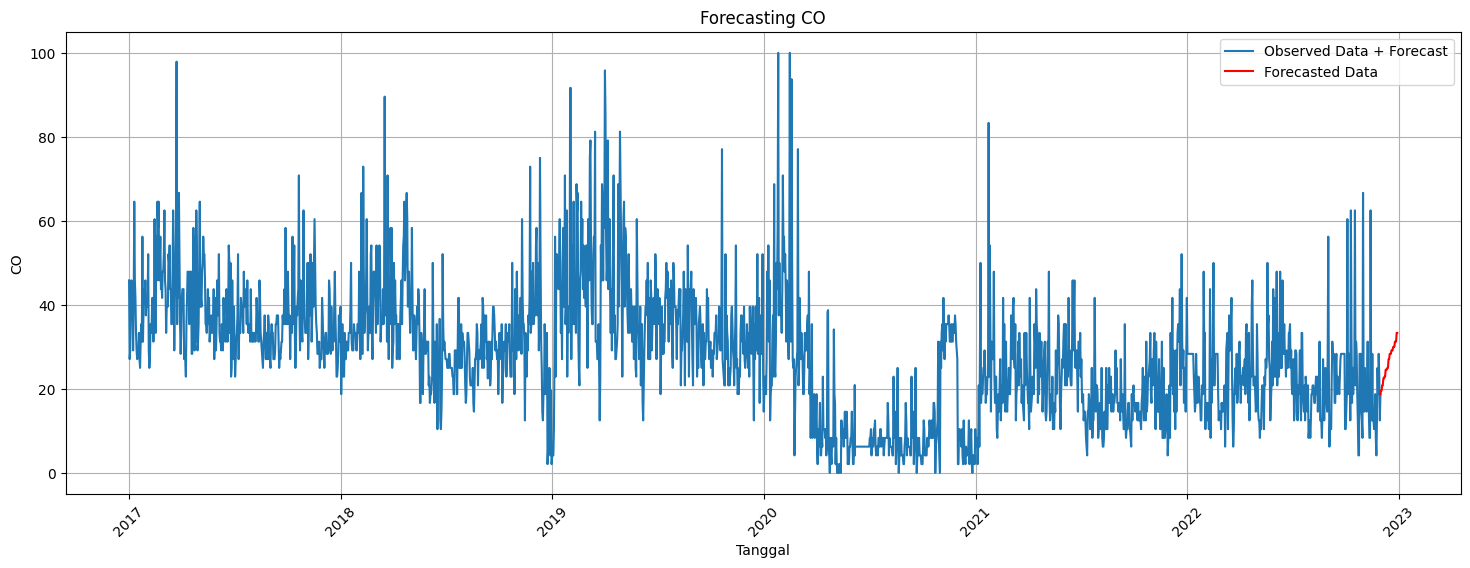

In [102]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['CO'].min()
max_par = DKI1['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.220
MSE: 0.048
MAE: 0.203
R-Squared: -3.442
       Tanggal         CO
0   2022-11-30  14.583333
1   2022-12-01  19.583333
2   2022-12-02  27.083333
3   2022-12-03  37.500000
4   2022-12-04  38.750000
5   2022-12-05  38.750000
6   2022-12-06  38.750000
7   2022-12-07  38.750000
8   2022-12-08  38.750000
9   2022-12-09  38.750000
10  2022-12-10  38.750000
11  2022-12-11  38.750000
12  2022-12-12  38.750000
13  2022-12-13  38.750000
14  2022-12-14  38.750000
15  2022-12-15  38.750000
16  2022-12-16  38.750000
17  2022-12-17  38.750000
18  2022-12-18  38.750000
19  2022-12-19  38.750000
20  2022-12-20  38.750000
21  2022-12-21  38.750000
22  2022-12-22  38.750000
23  2022-12-23  38.750000
24  2022-12-24  38.750000
25  2022-12-25  38.750000
26  2022-12-26  38.750000
27  2022-12-27  38.750000
28  2022-12-28  38.750000
29  2022-12-29  38.750000


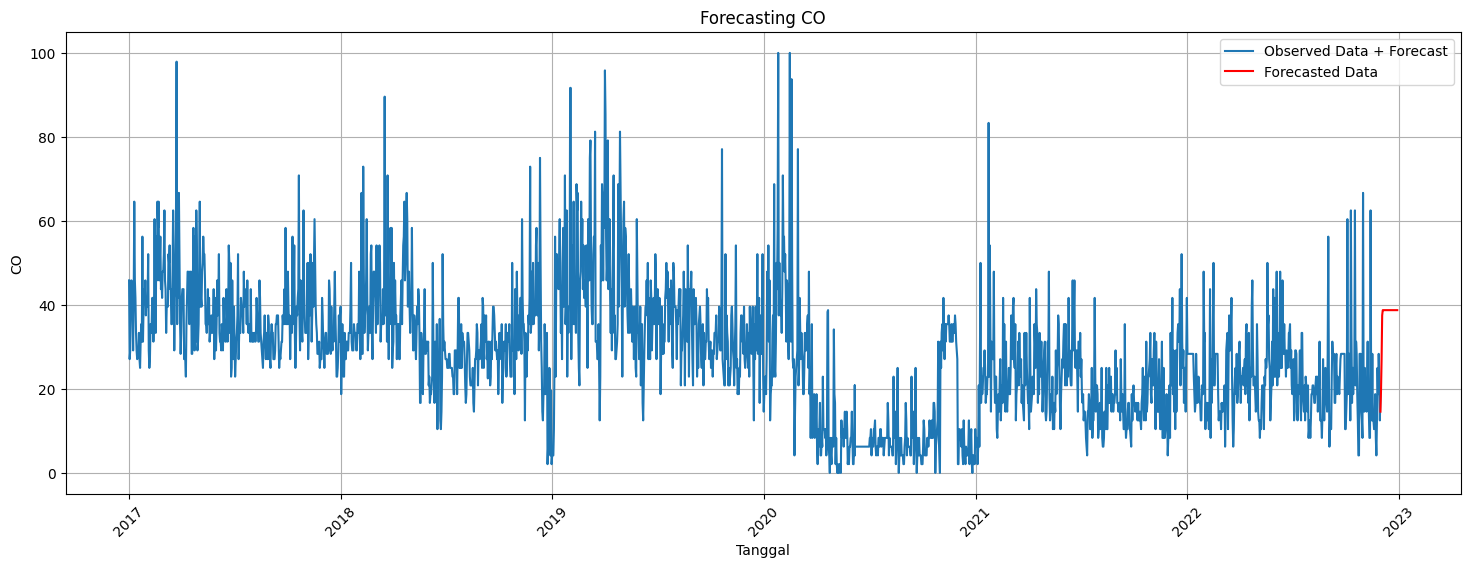

In [104]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['CO'].min()
max_par = DKI1['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.120
MSE: 0.014
MAE: 0.074
R-Squared: -0.322
       Tanggal    CO
0   2022-11-30  12.5
1   2022-12-01  12.5
2   2022-12-02  12.5
3   2022-12-03  12.5
4   2022-12-04  12.5
5   2022-12-05  12.5
6   2022-12-06  12.5
7   2022-12-07  12.5
8   2022-12-08  12.5
9   2022-12-09  12.5
10  2022-12-10  12.5
11  2022-12-11  12.5
12  2022-12-12  12.5
13  2022-12-13  12.5
14  2022-12-14  12.5
15  2022-12-15  12.5
16  2022-12-16  12.5
17  2022-12-17  12.5
18  2022-12-18  12.5
19  2022-12-19  12.5
20  2022-12-20  12.5
21  2022-12-21  12.5
22  2022-12-22  12.5
23  2022-12-23  12.5
24  2022-12-24  12.5
25  2022-12-25  12.5
26  2022-12-26  12.5
27  2022-12-27  12.5
28  2022-12-28  12.5
29  2022-12-29  12.5


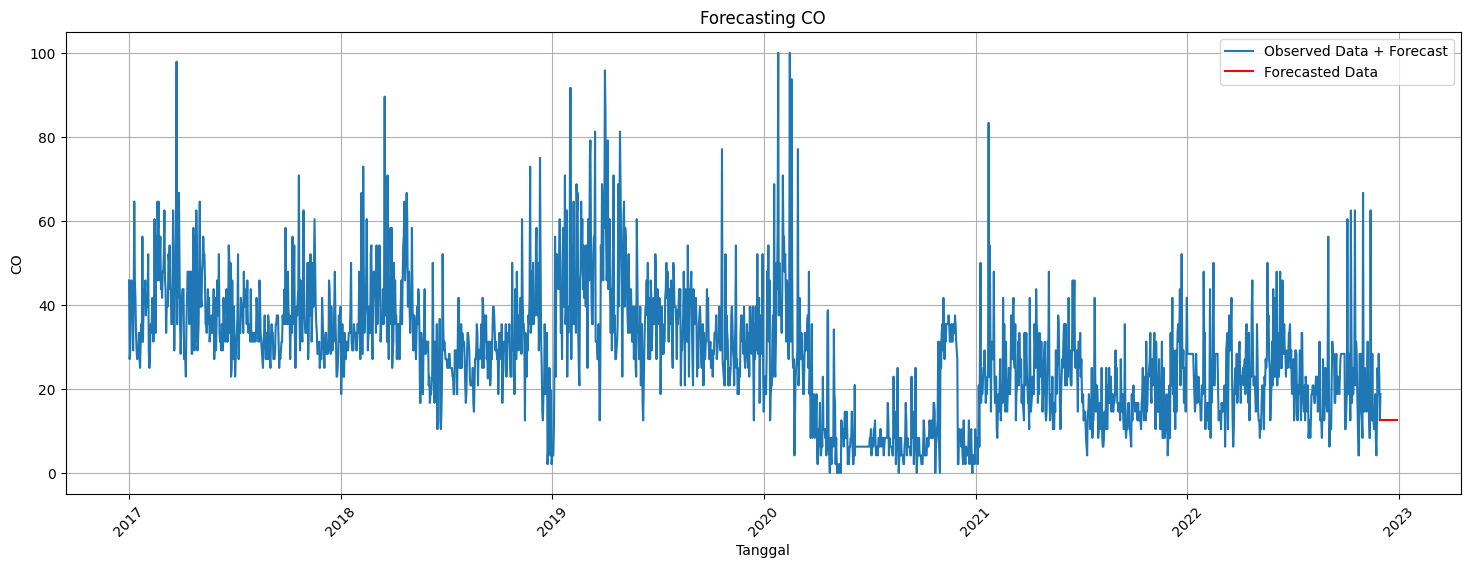

In [106]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['CO'].min()
max_par = DKI1['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.136
MSE: 0.018
MAE: 0.115
R-Squared: -0.691
       Tanggal         CO
0   2022-11-30  27.083333
1   2022-12-01  27.083333
2   2022-12-02  27.083333
3   2022-12-03  27.083333
4   2022-12-04  27.083333
5   2022-12-05  27.083333
6   2022-12-06  27.083333
7   2022-12-07  27.083333
8   2022-12-08  27.083333
9   2022-12-09  27.083333
10  2022-12-10  27.083333
11  2022-12-11  27.083333
12  2022-12-12  27.083333
13  2022-12-13  27.083333
14  2022-12-14  27.083333
15  2022-12-15  27.083333
16  2022-12-16  27.083333
17  2022-12-17  27.083333
18  2022-12-18  27.083333
19  2022-12-19  27.083333
20  2022-12-20  27.083333
21  2022-12-21  27.083333
22  2022-12-22  27.083333
23  2022-12-23  27.083333
24  2022-12-24  27.083333
25  2022-12-25  27.083333
26  2022-12-26  27.083333
27  2022-12-27  27.083333
28  2022-12-28  27.083333
29  2022-12-29  27.083333


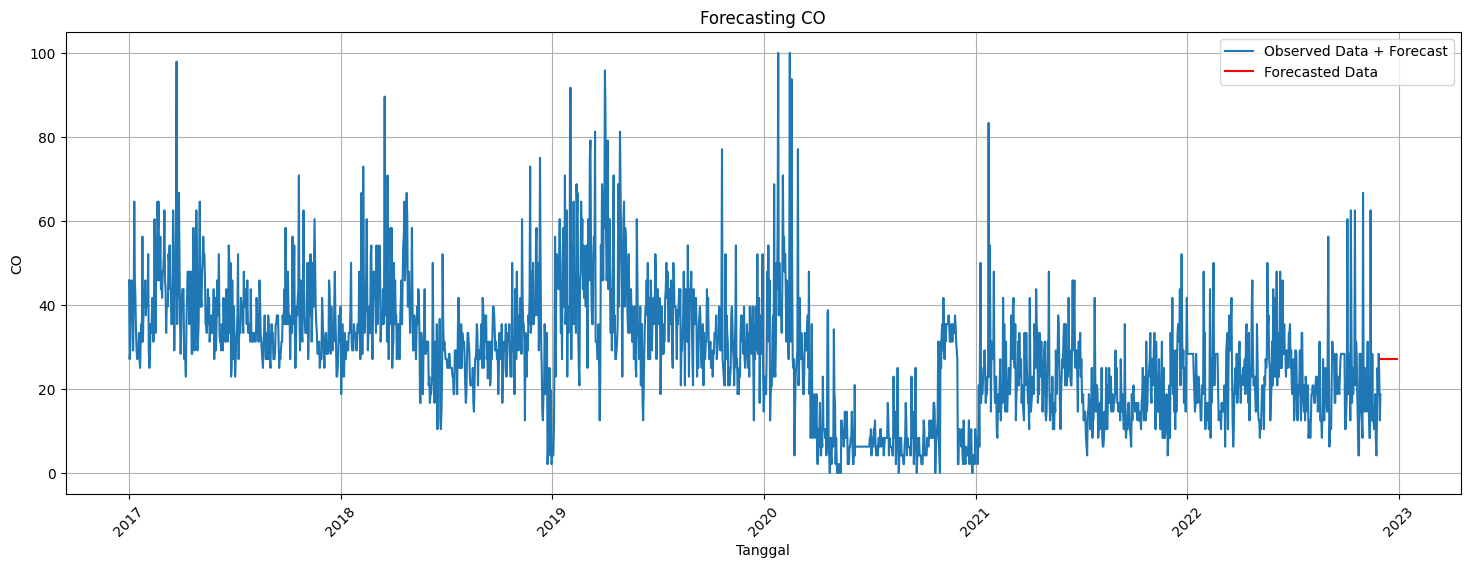

In [108]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI1['CO'].min()
max_par = DKI1['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI1['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.136
MSE: 0.018
MAE: 0.115
R-Squared: -0.691
       Tanggal         CO
0   2022-11-30  27.083333
1   2022-12-01  27.083333
2   2022-12-02  27.083333
3   2022-12-03  27.083333
4   2022-12-04  27.083333
5   2022-12-05  27.083333
6   2022-12-06  27.083333
7   2022-12-07  27.083333
8   2022-12-08  27.083333
9   2022-12-09  27.083333
10  2022-12-10  27.083333
11  2022-12-11  27.083333
12  2022-12-12  27.083333
13  2022-12-13  27.083333
14  2022-12-14  27.083333
15  2022-12-15  27.083333
16  2022-12-16  27.083333
17  2022-12-17  27.083333
18  2022-12-18  27.083333
19  2022-12-19  27.083333
20  2022-12-20  27.083333
21  2022-12-21  27.083333
22  2022-12-22  27.083333
23  2022-12-23  27.083333
24  2022-12-24  27.083333
25  2022-12-25  27.083333
26  2022-12-26  27.083333
27  2022-12-27  27.083333
28  2022-12-28  27.083333
29  2022-12-29  27.083333


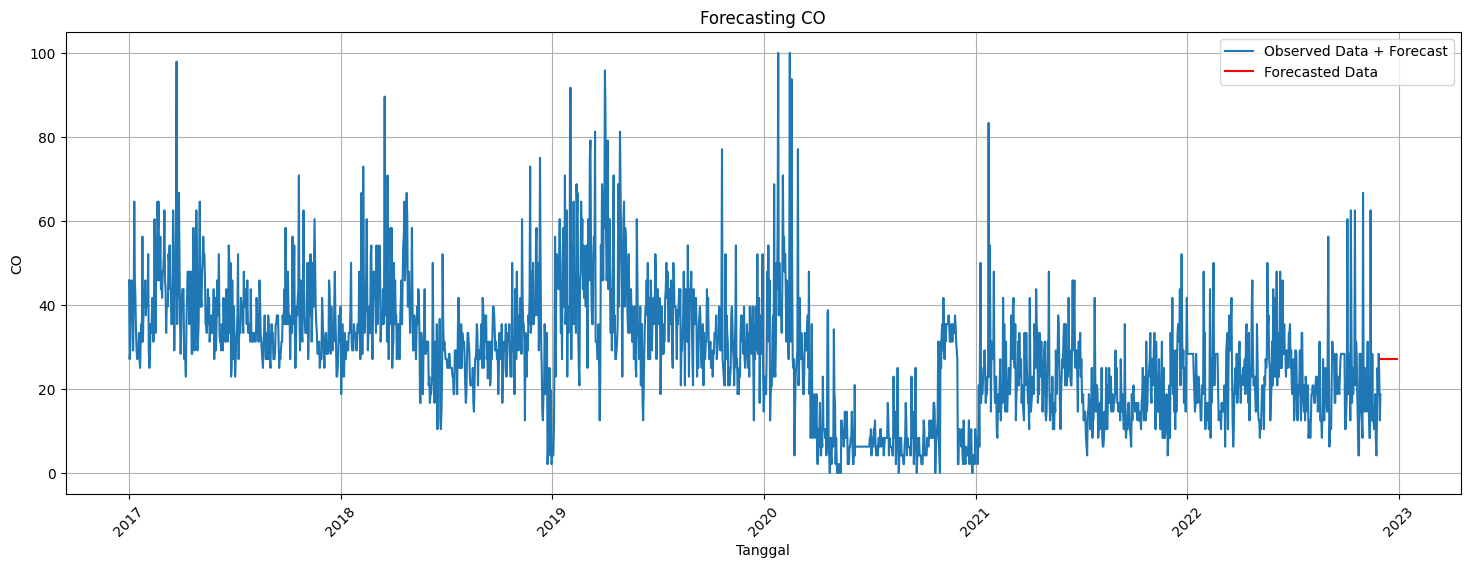

In [110]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI1['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI1[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI1['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['PM10'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
